In [2]:
!pip install plotly --upgrade

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
base_partida = pd.read_csv('/content/20190704111046-RoboCIn_2-vs-Razi2018_3.rcg.csv')

In [5]:
base_partida

,show_time,playmode,team_name_l,team_name_r,team_score_l,team_score_r,team_pen_score_l,team_pen_score_r,team_pen_miss_l,team_pen_miss_r,ball_x,ball_y,ball_vx,ball_vy,player_l1_side,player_l1_unum,player_l1_type,player_l1_state,player_l1_x,player_l1_y,player_l1_vx,player_l1_vy,player_l1_body,player_l1_neck,player_l1_point_to_x,player_l1_point_to_y,player_l1_view_quality,player_l1_view_width,player_l1_attribute_stamina,player_l1_attribute_effort,player_l1_attribute_recovery,player_l1_attribute_stamina_capacity,player_l1_focus_side,player_l1_focus_unum,player_l1_counting_kick,player_l1_counting_dash,player_l1_counting_turn,player_l1_counting_catch,player_l1_counting_move,player_l1_counting_turn_neck,...,player_r10_counting_turn,player_r10_counting_catch,player_r10_counting_move,player_r10_counting_turn_neck,player_r10_counting_change_view,player_r10_counting_say,player_r10_counting_tackle,player_r10_counting_point_to,player_r10_counting_attention_to,player_r11_side,player_r11_unum,player_r11_type,player_r11_state,player_r11_x,player_r11_y,player_r11_vx,player_r11_vy,player_r11_body,player_r11_neck,player_r11_point_to_x,player_r11_point_to_y,player_r11_view_quality,player_r11_view_width,player_r11_attribute_stamina,player_r11_attribute_effort,player_r11_attribute_recovery,player_r11_attribute_stamina_capacity,player_r11_focus_side,player_r11_focus_unum,player_r11_counting_kick,player_r11_counting_dash,player_r11_counting_turn,player_r11_counting_catch,player_r11_counting_move,player_r11_counting_turn_neck,player_r11_counting_change_view,player_r11_counting_say,player_r11_counting_tackle,player_r11_counting_point_to,player_r11_counting_attention_to
0,1,kick_off_l,RoboCIn,Razi2018,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,l,1,0,0x9,-49.0000,0.0000,0.0000,0.0000,94.875,-90.0,NaN,NaN,h,180.0,8000.0,1.0,1.0,130600.0,NaN,NaN,0,0,184,0,1,185,...,104,0,1,105,1,0,0,0,1,r,11,13,0x1,3.5000,-10.3000,0.0000,0.0000,35.978,35.0,NaN,NaN,h,120.0,8000.00,0.988751,1.0,130600.0,r,1.0,0,0,99,0,1,100,2,0,0,0,1
1,2,kick_off_l,RoboCIn,Razi2018,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,l,1,0,0x9,-49.1120,-0.0065,-0.0448,-0.0026,94.875,-90.0,NaN,NaN,h,180.0,8000.0,1.0,1.0,130555.0,l,2.0,0,1,184,0,1,186,...,104,0,1,106,1,0,0,0,2,r,11,13,0x1,3.8344,-10.0839,0.1177,0.0761,35.978,90.0,NaN,NaN,h,120.0,7979.37,0.988751,1.0,130559.0,r,2.0,0,1,99,0,1,101,2,0,0,0,2
2,3,play_on,RoboCIn,Razi2018,0,0,0,0,0,0,-2.0204,-0.6272,-1.8992,-0.5896,l,1,0,0x9,-49.2950,0.1340,-0.0732,0.0562,94.875,-90.0,NaN,NaN,h,180.0,8000.0,1.0,1.0,130510.0,l,4.0,0,2,184,0,1,187,...,104,0,1,107,2,0,0,0,3,r,11,13,0x1,4.2715,-9.7855,0.1538,0.1050,35.978,88.0,NaN,NaN,h,60.0,7958.89,0.988751,1.0,130517.0,r,10.0,0,2,99,0,1,102,3,0,0,0,3
3,4,play_on,RoboCIn,Razi2018,0,0,0,0,0,0,-3.8679,-1.2573,-1.7366,-0.5923,l,1,0,0x9,-49.3624,0.1905,-0.0269,0.0226,-142.922,90.0,NaN,NaN,h,120.0,8000.0,1.0,1.0,130510.0,l,5.0,0,2,185,0,1,188,...,105,0,1,108,2,0,0,0,3,r,11,13,0x1,4.4087,-9.6802,0.0483,0.0371,150.160,-90.0,NaN,NaN,h,120.0,8000.00,0.988751,1.0,130476.0,r,10.0,0,2,100,0,1,103,4,1,0,0,3
4,5,play_on,RoboCIn,Razi2018,0,0,0,0,0,0,-5.5782,-1.8469,-1.6077,-0.5542,l,1,0,0x9,-49.3893,0.2130,-0.0108,0.0090,-92.262,90.0,NaN,NaN,h,120.0,8000.0,1.0,1.0,130510.0,l,6.0,0,2,186,0,1,189,...,105,0,1,109,2,1,0,0,3,r,11,13,0x1,4.4591,-9.6448,0.0177,0.0124,-171.808,-40.0,NaN,NaN,h,120.0,8000.00,0.988751,1.0,130476.0,r,10.0,0,2,101,0,1,104,4,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7444,5996,play_on,RoboCIn,Razi2018,2,3,0,0,0,0,-12.1354,8.2409,0.1380,-1.2110,l,1,0,0x9,-50.2705,1.7373,-0.0117,-0.1245,-93.080,90.0,NaN,NaN,h,120.0,8000.0,1.0,1.0,120106.0,l,11.0,1,330,7389,1,8,7729,...,3977,0,7,7649,570,2048,6,260,2275,r,11,13,0x1,-30.6207,3.7

In [6]:
base_partida.tail()

,show_time,playmode,team_name_l,team_name_r,team_score_l,team_score_r,team_pen_score_l,team_pen_score_r,team_pen_miss_l,team_pen_miss_r,ball_x,ball_y,ball_vx,ball_vy,player_l1_side,player_l1_unum,player_l1_type,player_l1_state,player_l1_x,player_l1_y,player_l1_vx,player_l1_vy,player_l1_body,player_l1_neck,player_l1_point_to_x,player_l1_point_to_y,player_l1_view_quality,player_l1_view_width,player_l1_attribute_stamina,player_l1_attribute_effort,player_l1_attribute_recovery,player_l1_attribute_stamina_capacity,player_l1_focus_side,player_l1_focus_unum,player_l1_counting_kick,player_l1_counting_dash,player_l1_counting_turn,player_l1_counting_catch,player_l1_counting_move,player_l1_counting_turn_neck,...,player_r10_counting_turn,player_r10_counting_catch,player_r10_counting_move,player_r10_counting_turn_neck,player_r10_counting_change_view,player_r10_counting_say,player_r10_counting_tackle,player_r10_counting_point_to,player_r10_counting_attention_to,player_r11_side,player_r11_unum,player_r11_type,player_r11_state,player_r11_x,player_r11_y,player_r11_vx,player_r11_vy,player_r11_body,player_r11_neck,player_r11_point_to_x,player_r11_point_to_y,player_r11_view_quality,player_r11_view_width,player_r11_attribute_stamina,player_r11_attribute_effort,player_r11_attribute_recovery,player_r11_attribute_stamina_capacity,player_r11_focus_side,player_r11_focus_unum,player_r11_counting_kick,player_r11_counting_dash,player_r11_counting_turn,player_r11_counting_catch,player_r11_counting_move,player_r11_counting_turn_neck,player_r11_counting_change_view,player_r11_counting_say,player_r11_counting_tackle,player_r11_counting_point_to,player_r11_counting_attention_to
7444,5996,play_on,RoboCIn,Razi2018,2,3,0,0,0,0,-12.1354,8.2409,0.1380,-1.2110,l,1,0,0x9,-50.2705,1.7373,-0.0117,-0.1245,-93.08,90.0,NaN,NaN,h,120.0,8000.0,1.0,1.0,120106.0,l,11.0,1,330,7389,1,8,7729,...,3977,0,7,7649,570,2048,6,260,2275,r,11,13,0x1,-30.6207,3.7246,0.2323,-0.0710,-14.923,-46.0,NaN,NaN,h,60.0,7321.88,0.988751,1.0,25319.1,r,3.0,41,2498,5079,0,7,7644,416,1290,1,113,2286
7445,5997,play_on,RoboCIn,Razi2018,2,3,0,0,0,0,-11.6215,5.4234,0.4830,-2.6484,l,1,0,0x9,-50.2890,1.6132,-0.0074,-0.0496,-93.08,90.0,NaN,NaN,h,180.0,8000.0,1.0,1.0,120106.0,l,2.0,1,330,7390,1,8,7730,...,3977,0,7,7650,570,2048,6,260,2275,r,11,13,0x1,-29.9710,3.5800,0.2286,-0.0509,-14.923,14.0,NaN,NaN,h,60.0,7292.99,0.988751,1.0,25277.8,r,3.0,41,2499,5079,0,7,7645,416,1290,1,113,2286
7446,5998,play_on,RoboCIn,Razi2018,2,3,0,0,0,0,-11.1025,2.7358,0.4879,-2.5264,l,1,0,0x9,-50.2990,1.5614,-0.0040,-0.0207,-93.08,90.0,NaN,NaN,h,180.0,8000.0,1.0,1.0,120106.0,l,9.0,1,330,7391,1,8,7731,...,3977,0,7,7651,571,2049,6,260,2276,r,11,13,0x1,-29.7573,3.5414,0.0752,-0.0136,-42.856,-84.0,NaN,NaN,h,120.0,7334.26,0.988751,1.0,25236.5,r,9.0,41,2499,5080,0,7,7646,417,1291,1,113,2287
7447,5999,play_on,RoboCIn,Razi2018,2,3,0,0,0,0,-10.5800,0.2234,0.4912,-2.3616,l,1,0,0x9,-50.3026,1.5401,-0.0015,-0.0085,-93.08,90.0,NaN,NaN,h,180.0,8000.0,1.0,1.0,120106.0,l,10.0,1,330,7392,1,8,7732,...,3977,0,7,7652,571,2050,6,260,2277,r,11,13,0x1,-29.3468,3.2146,0.1444,-0.1150,-42.856,82.0,NaN,NaN,h,120.0,7305.37,0.988751,1.0,25195.3,r,10.0,41,2500,5080,0,7,7647,417,1291,1,113,2288
7448,6000,time_over,RoboCIn,Razi2018,2,3,0,0,0,0,-10.0497,-2.0285,0.4985,-2.1168,l,1,0,0x9,-50.3104,1.2585,-0.0031,-0.1126,-93.08,90.0,NaN,NaN,h,180.0,8000.0,1.0,1.0,120061.0,l,11.0,1,331,7392,1,8,7733,...,3977,0,7,7653,571,2050,6,260,2278,r,11,13,0x1,-28.8547,2.7618,0.1732,-0.1593,-42.856,-90.0,NaN,NaN,h,120.0,7276.48,0.988751,1.0,25154.0,NaN,NaN,41,2501,5080,0,7,7648,417,1292,1,113,2289


A partida termina 2x3

In [7]:
base_partida.shape

(7449, 696)

In [8]:
base_partida.describe()

,show_time,team_score_l,team_score_r,team_pen_score_l,team_pen_score_r,team_pen_miss_l,team_pen_miss_r,ball_x,ball_y,ball_vx,ball_vy,player_l1_unum,player_l1_type,player_l1_x,player_l1_y,player_l1_vx,player_l1_vy,player_l1_body,player_l1_neck,player_l1_point_to_x,player_l1_point_to_y,player_l1_view_width,player_l1_attribute_stamina,player_l1_attribute_effort,player_l1_attribute_recovery,player_l1_attribute_stamina_capacity,player_l1_focus_unum,player_l1_counting_kick,player_l1_counting_dash,player_l1_counting_turn,player_l1_counting_catch,player_l1_counting_move,player_l1_counting_turn_neck,player_l1_counting_change_view,player_l1_counting_say,player_l1_counting_tackle,player_l1_counting_point_to,player_l1_counting_attention_to,player_l2_unum,player_l2_type,...,player_r10_attribute_stamina_capacity,player_r10_focus_unum,player_r10_counting_kick,player_r10_counting_dash,player_r10_counting_turn,player_r10_counting_catch,player_r10_counting_move,player_r10_counting_turn_neck,player_r10_counting_change_view,player_r10_counting_say,player_r10_counting_tackle,player_r10_counting_point_to,player_r10_counting_attention_to,player_r11_unum,player_r11_type,player_r11_x,player_r11_y,player_r11_vx,player_r11_vy,player_r11_body,player_r11_neck,player_r11_point_to_x,player_r11_point_to_y,player_r11_view_width,player_r11_attribute_stamina,player_r11_attribute_effort,player_r11_attribute_recovery,player_r11_attribute_stamina_capacity,player_r11_focus_unum,player_r11_counting_kick,player_r11_counting_dash,player_r11_counting_turn,player_r11_counting_catch,player_r11_counting_move,player_r11_counting_turn_neck,player_r11_counting_change_view,player_r11_counting_say,player_r11_counting_tackle,player_r11_counting_point_to,player_r11_counting_attention_to
count,7449.00000,7449.000000,7449.000000,7449.0,7449.0,7449.0,7449.0,7449.000000,7449.000000,7449.000000,7449.000000,7449.0,7449.0,7449.000000,7449.000000,7449.000000,7449.00000,7449.000000,7449.000000,0.0,0.0,7449.000000,7449.000000,7449.0,7449.0,7449.000000,7226.000000,7449.000000,7449.000000,7449.000000,7449.000000,7449.000000,7449.000000,7449.000000,7449.000000,7449.0,7449.0,7449.000000,7449.0,7449.0,...,7449.000000,7152.000000,7449.000000,7449.000000,7449.000000,7449.0,7449.000000,7449.000000,7449.000000,7449.000000,7449.000000,7449.000000,7449.000000,7449.0,7449.0,7449.000000,7449.000000,7449.000000,7449.000000,7449.000000,7449.000000,1423.000000,1423.000000,7449.000000,7449.000000,7.449000e+03,7449.0,7449.000000,7208.000000,7449.000000,7449.000000,7449.000000,7449.0,7449.000000,7449.000000,7449.000000,7449.000000,7449.000000,7449.000000,7449.000000
mean,3004.86911,1.121627,1.083770,0.0,0.0,0.0,0.0,-1.733762,7.338112,-0.006454,0.000260,1.0,0.0,-49.719826,2.142405,-0.000849,0.00139,6.545966,-5.548933,NaN,NaN,154.611357,7991.150792,1.0,1.0,124984.967378,6.244395,0.811116,173.887636,3780.245536,0.818902,4.384615,3960.147805,57.970466,271.322459,0.0,0.0,2441.310511,2.0,6.0,...,64071.017088,6.740352,17.962948,1888.661834,1959.539670,0.0,3.715398,3880.147805,290.679286,1040.302188,2.160021,146.930863,1135.591623,11.0,13.0,-11.677945,-0.294941,-0.009252,0.004108,18.224547,0.588938,-20.911282,9.097881,118.469593,7355.763939,9.887510e-01,1.0,75352.416915,6.641787,26.006175,1313.710834,2520.438448,0.0,3.715667,3875.147805,219.425829,690.001477,0.534300,54.688817,1171.757014
std,1742.03530,0.428854,0.911035,0.0,0.0,0.0,0.0,32.578772,23.900709,0.593762,0.626371,0.0,0.0,1.558744,3.680252,0.014768,0.03494,81.875209,77.807517,NaN,NaN,32.566753,53.985506,0.0,0.0,3912.331548,2.688599,0.391443,90.649391,2102.597537,0.385125,2.095052,2193.909381,30.478417,159.911456,0.0,0.0,1412.198365,0.0,0.0,...,42608.588630,2.552013,12.070137,1043.452795,1133.593108,0.0,1.634526,2193.909381,168.668271,621.890420,1.583059,84.005742,640.422359,0.0,0.0,20.538647,8.870834,0.129342,0.091824,91.309189,67.859667,19.187920,7.997929,40.569511,834.420215,8.627012e-14,0.0,30076.850745,2.359323,9.981762,690.892054,1489.536529,0.0,1.63

  Pelas posições mínima e máximas da bola no campo. Podemos supor que as dimensões do campo são [-53, 53] no eixo x e [-34, 34] no eixo y.
  O máximo do showtime é 2589.

###Visualização dos Dados

In [10]:
np.unique(base_partida['playmode'], return_counts= True)

(array(['corner_kick_l', 'corner_kick_r', 'foul_charge_l', 'foul_charge_r',
        'free_kick_l', 'free_kick_r', 'goal_kick_r', 'goal_l', 'goal_r',
        'kick_in_l', 'kick_in_r', 'kick_off_l', 'kick_off_r', 'offside_l',
        'play_on', 'time_over'], dtype=object),
 array([ 180,  146,  630,  540,  302,  385,   33,  102,  153,  472,  609,
         102,   86,   30, 3678,    1]))

In [11]:
base_partida.dtypes

show_time                            int64
playmode                            object
team_name_l                         object
team_name_r                         object
team_score_l                         int64
                                     ...  
player_r11_counting_change_view      int64
player_r11_counting_say              int64
player_r11_counting_tackle           int64
player_r11_counting_point_to         int64
player_r11_counting_attention_to     int64
Length: 696, dtype: object

In [12]:
base_partida.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7449 entries, 0 to 7448
Columns: 696 entries, show_time to player_r11_counting_attention_to
dtypes: float64(312), int64(293), object(91)
memory usage: 39.6+ MB


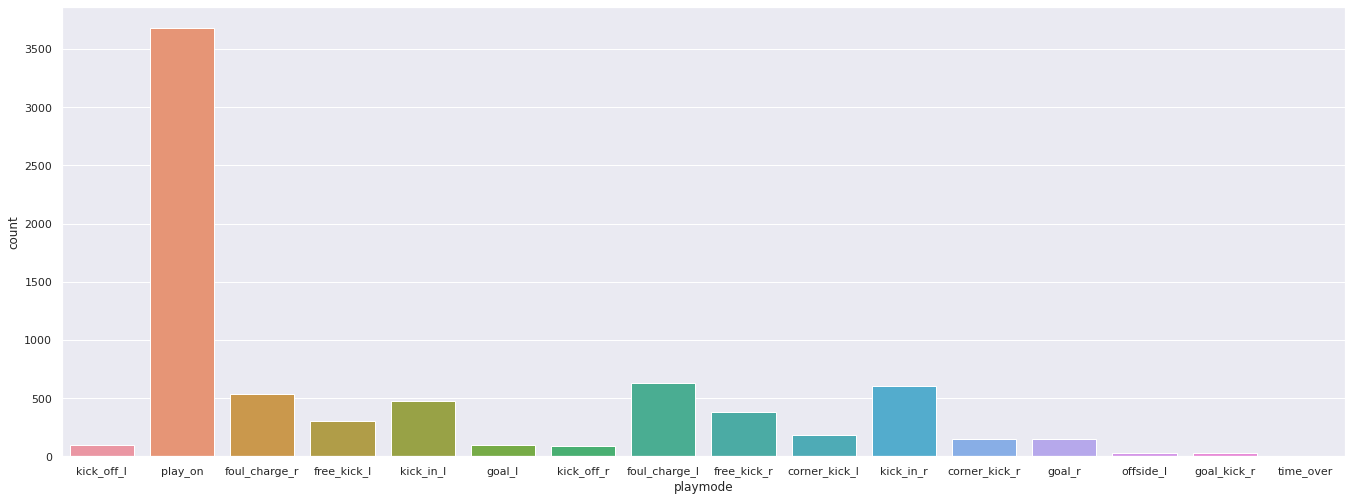

In [13]:
sns.set(rc={'figure.figsize':(23,8.27)})
sns.countplot(x = base_partida['playmode']);

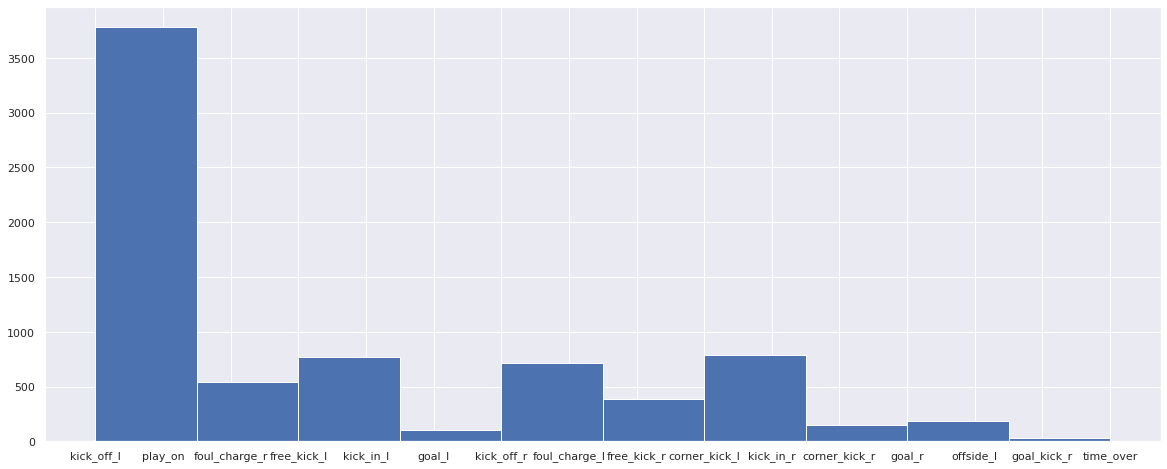

In [14]:
plt.figure(figsize=(20,8))
plt.hist(x = base_partida['playmode']);

In [15]:
base_partida[base_partida['team_score_l'] != 0]

,show_time,playmode,team_name_l,team_name_r,team_score_l,team_score_r,team_pen_score_l,team_pen_score_r,team_pen_miss_l,team_pen_miss_r,ball_x,ball_y,ball_vx,ball_vy,player_l1_side,player_l1_unum,player_l1_type,player_l1_state,player_l1_x,player_l1_y,player_l1_vx,player_l1_vy,player_l1_body,player_l1_neck,player_l1_point_to_x,player_l1_point_to_y,player_l1_view_quality,player_l1_view_width,player_l1_attribute_stamina,player_l1_attribute_effort,player_l1_attribute_recovery,player_l1_attribute_stamina_capacity,player_l1_focus_side,player_l1_focus_unum,player_l1_counting_kick,player_l1_counting_dash,player_l1_counting_turn,player_l1_counting_catch,player_l1_counting_move,player_l1_counting_turn_neck,...,player_r10_counting_turn,player_r10_counting_catch,player_r10_counting_move,player_r10_counting_turn_neck,player_r10_counting_change_view,player_r10_counting_say,player_r10_counting_tackle,player_r10_counting_point_to,player_r10_counting_attention_to,player_r11_side,player_r11_unum,player_r11_type,player_r11_state,player_r11_x,player_r11_y,player_r11_vx,player_r11_vy,player_r11_body,player_r11_neck,player_r11_point_to_x,player_r11_point_to_y,player_r11_view_quality,player_r11_view_width,player_r11_attribute_stamina,player_r11_attribute_effort,player_r11_attribute_recovery,player_r11_attribute_stamina_capacity,player_r11_focus_side,player_r11_focus_unum,player_r11_counting_kick,player_r11_counting_dash,player_r11_counting_turn,player_r11_counting_catch,player_r11_counting_move,player_r11_counting_turn_neck,player_r11_counting_change_view,player_r11_counting_say,player_r11_counting_tackle,player_r11_counting_point_to,player_r11_counting_attention_to
287,198,goal_l,RoboCIn,Razi2018,1,0,0,0,0,0,53.5903,3.0186,0.0000,0.0000,l,1,0,0x9,-49.3750,-0.7152,-0.0000,-0.0000,91.27,-90.0,NaN,NaN,h,180.0,8000.0,1.0,1.0,130375.0,l,9.0,0,4,467,0,1,472,...,279,0,1,392,19,44,0,2,107,r,11,13,0x1,3.5760,-0.4221,-0.0023,0.0090,24.741,-70.0,NaN,NaN,h,180.0,7034.90,0.988751,1.0,118839.0,NaN,NaN,0,170,216,0,1,387,18,87,0,0,99
288,198,goal_l,RoboCIn,Razi2018,1,0,0,0,0,0,53.5903,3.0186,0.0000,0.0000,l,1,0,0x9,-49.3750,-0.7152,-0.0000,-0.0000,91.27,-90.0,NaN,NaN,h,180.0,8000.0,1.0,1.0,130375.0,l,9.0,0,4,468,0,1,473,...,280,0,1,393,19,44,0,2,107,r,11,13,0x1,3.4972,-10.2903,-0.0010,0.0034,24.741,0.0,NaN,NaN,h,180.0,7076.16,0.988751,1.0,118798.0,NaN,NaN,0,170,216,0,2,388,18,87,0,0,99
289,198,goal_l,RoboCIn,Razi2018,1,0,0,0,0,0,53.5903,3.0186,0.0000,0.0000,l,1,0,0x9,-49.3750,-0.7152,-0.0000,-0.0000,91.27,-90.0,NaN,NaN,h,180.0,8000.0,1.0,1.0,130375.0,l,9.0,0,4,469,0,1,474,...,281,0,1,394,20,44,0,2,107,r,11,13,0x1,3.4961,-10.2869,-0.0004,0.0012,-144.721,0.0,NaN,NaN,h,180.0,7117.43,0.988751,1.0,118757.0,NaN,NaN,0,170,217,0,2,389,18,87,0,0,99
290,198,goal_l,RoboCIn,Razi2018,1,0,0,0,0,0,53.5903,3.0186,0.0000,0.0000,l,1,0,0x9,-49.3750,-0.7152,-0.0000,-0.0000,-100.64,-90.0,NaN,NaN,h,180.0,8000.0,1.0,1.0,130375.0,l,9.0,0,4,470,0,1,475,...,281,0,2,395,20,44,0,2,107,r,11,13,0x1,3.4956,-10.2856,-0.0001,0.0004,-144.721,0.0,NaN,NaN,h,180.0,7158.69,0.988751,1.0,118716.0,NaN,NaN,0,170,218,0,2,390,18,87,0,0,99
291,198,goal_l,RoboCIn,Razi2018,1,0,0,0,0,0,53.5903,3.0186,0.0000,0.0000,l,1,0,0x9,-49.3750,-0.7152,-0.0000,-0.0000,-100.64,-90.0,NaN,NaN,h,180.0,8000.0,1.0,1.0,130375.0,l,9.0,0,4,471,0,1,476,...,282,0,2,396,20,44,0,2,107,r,11,13,0x1,3.4955,-10.2852,-0.0000,0.0001,-144.721,0.0,NaN,NaN,h,180.0,7199.96,0.988751,1.0,118674.0,NaN,NaN,0,170,219,0,2,391,18,87,0,0,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7444,5996,play_on,RoboCIn,Razi2018,2,3,0,0,0,0,-12.1354,8.2409,0.1380,-1.2110,l,1,0,0x9,-50.2705,1.7373,-0.0117,-0.1245,-93.08,90.0,NaN,NaN,h,120.0,8000.0,1.0,1.0,120106.0,l,11.0,1,330,7389,1,8,

Este gráfico me diz em quais posições a bola mais estava de acordo com suas coordenadas (x, y). 

In [16]:
grafico = px.treemap(base_partida, path = ['ball_x', 'ball_y'])
grafico.show()

In [17]:
grafico = px.treemap(base_partida, path = ['ball_y', 'ball_x'])
grafico.show()

Percebe-se uma forte presença no intervalo [33,34] do eixo y. Ou seja houve bastante lateral do lado superior do campo.

In [18]:
grafico = px.scatter_matrix(base_partida, dimensions = ['player_l1_attribute_stamina'], color = 'player_l1_view_width')
grafico.show()

In [19]:
grafico = px.scatter_matrix(base_partida, dimensions = ['player_l3_attribute_stamina'], color = 'player_l3_view_width')
grafico.show()

In [20]:
grafico = px.scatter_matrix(base_partida, dimensions = ['player_r8_attribute_stamina'], color = 'player_r8_view_width')
grafico.show()

In [56]:
t = np.linspace(1,7449,7449)
capacidade_stamina_R4 = base_partida['player_r4_attribute_stamina_capacity'].values
stamina_R4 = base_partida['player_l1_attribute_stamina'].values
len(capacidade_stamina_R4)


7449

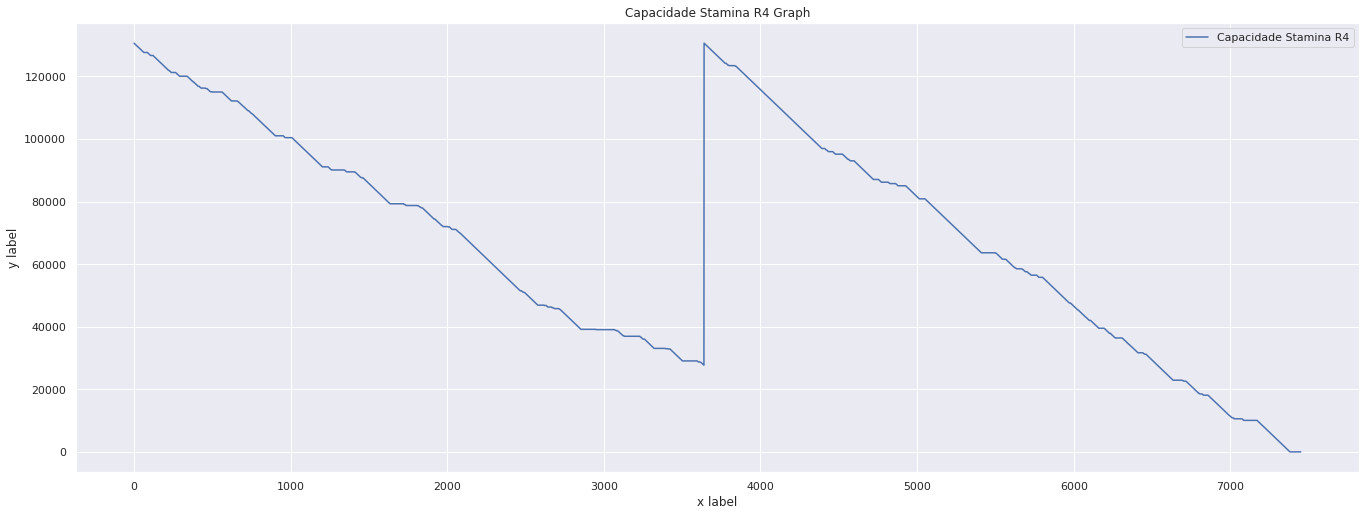

In [66]:
plt.title('Capacidade Stamina R4 Graph')
plt.plot(t, capacidade_stamina_R4, label= 'Capacidade Stamina R4')

plt.xlabel('x label')
plt.ylabel('y label')

plt.legend();


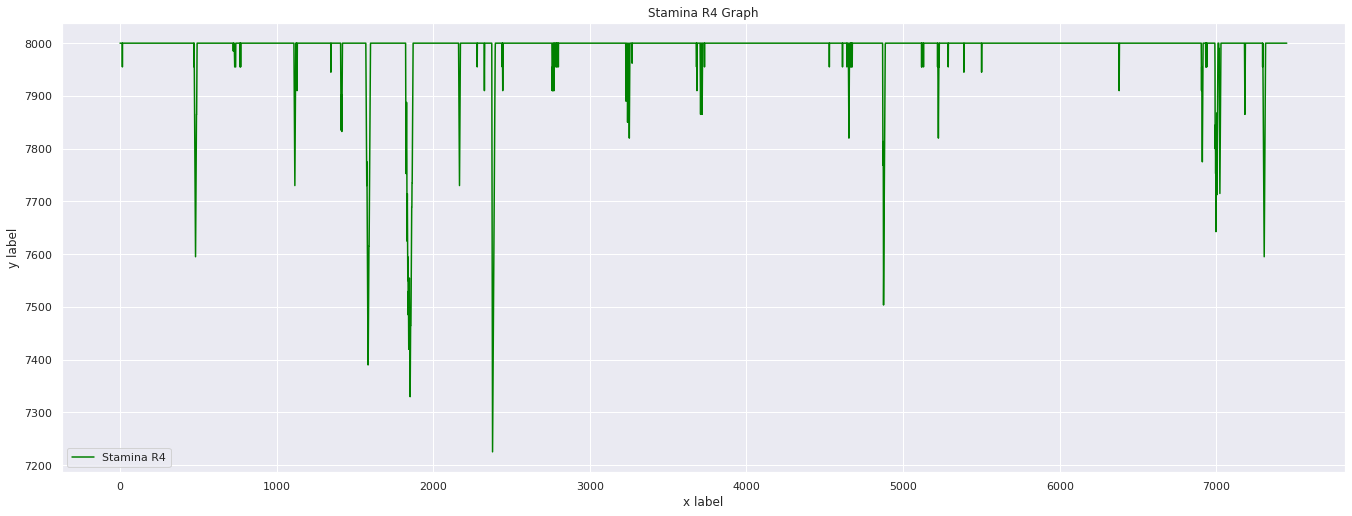

In [68]:
plt.title('Stamina R4 Graph')
plt.plot(t, stamina_R4, label= 'Stamina R4', color = 'green')

plt.xlabel('x label')
plt.ylabel('y label')

plt.legend();

Percebemos que a stamina é carregada com a capacidade da stamina. além disso, no intervalo do primeiro tempo para o segundo, a capacidade da stamina carrega.

###Identificando os Goleiros



In [75]:
player1_l = base_partida['player_l1_counting_catch']
player1_l

0       0
1       0
2       0
3       0
4       0
       ..
7444    1
7445    1
7446    1
7447    1
7448    1
Name: player_l1_counting_catch, Length: 7449, dtype: int64

In [80]:
player1_r = base_partida['player_r1_counting_catch']
player1_r

0       0
1       0
2       0
3       0
4       0
       ..
7444    0
7445    0
7446    0
7447    0
7448    0
Name: player_r1_counting_catch, Length: 7449, dtype: int64

O goleiro do RoboCin agarrou mais, porém sofreu mais ataque do time adversário.

##Dominança de Bola

In [21]:
def calcDist(xi, yi, xf, yf):
  return np.sqrt((xf - xi)**2 + (yf - yi)**2)

In [22]:
def calcMinimum(letra, current, posBx, posBy):
  minimo = 9999999
  for num in range(1,12):
    nameX = "player_" + letra + str(num) + "_x"
    nameY = "player_" + letra + str(num) + "_y"
    posX = current[nameX].values[0]
    posY = current[nameY].values[0]
    dist = calcDist(posX, posY, posBx, posBy)
    minimo = np.minimum(dist, minimo)
    return minimo
  

In [23]:
#Contadores de posse de bola
contadorL = 0
contadorR = 0

def processa(tempo, contadorL, contadorR):
  
  current = base_partida[base_partida['show_time'] == tempo]
  #display(current['player_l1_x'].values[0])
  nameX = ""
  nameY = ""
  minL = 9999999; minR = 9999999
  #Ball Position
  posBx = current['ball_x'].values[0]
  posBy = current['ball_y'].values[0]
  minL = calcMinimum('l', current, posBx, posBy)
  minR = calcMinimum('r', current, posBx, posBy)
  if minL <= minR:
    contadorL = contadorL + 1
  else:
    contadorR = contadorR + 1
  return contadorL, contadorR



In [24]:
#for i in range(10):
for i in range(1, 2590):
  contadorL, contadorR = processa(i, contadorL, contadorR)

PosseBolaL = (contadorL*100)/2589
PosseBolaR = (contadorR*100)/2589
print("a posse de bola do time do RoboCIn foi " + str(PosseBolaL) + "% e a posse de bola do time do Razi2018 foi " + str(PosseBolaR) + "%")

a posse de bola do time do RoboCIn foi 59.21205098493627% e a posse de bola do time do Razi2018 foi 40.78794901506373%
